# Program Header

In [1]:
import pandas as pd
import numpy as np
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from header import *

In [2]:
data_root = initialize_data_root("AH")

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Table of Contents
1. [Import](#Import)
2. [Create Tag Map](#CreateTagMap)
5. [Save](#Save)

# Import

In [4]:
q3mergeddata = pd.read_csv(data_root + '02-build/clean/2019q3/2019q3merged.csv')

In [10]:
q3mergeddata.describe()

,Unnamed: 0,dyrqt,cik,sic,AccountsPayableCurrent,AccountsReceivableNetCurrent,AccruedLiabilitiesCurrent,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,AccumulatedOtherComprehensiveIncomeLoss,AdditionalPaidInCapital,...,TotalLiabilities,TreasuryStockShares,TreasuryStockValue,WeightedAverageNumberOfDilutedSharesOutstanding,WeightedAverageNumberOfSharesOutstandingBasic,7_before,7_after,difference,per,Company Value
count,3655.000000,3655.000000,3.655000e+03,3655.000000,3.655000e+03,3.655000e+03,3.655000e+03,3.655000e+03,3.655000e+03,3.655000e+03,...,3.655000e+03,3.655000e+03,3.655000e+03,3.655000e+03,3.655000e+03,3655.000000,3655.000000,3655.000000,3655.000000,3.655000e+03
mean,1829.760055,201901.926949,1.080639e+06,4755.364159,3.421655e+08,2.471766e+08,1.280961e+08,7.655222e+08,-1.428478e+08,1.320179e+09,...,4.250458e+09,9.421859e+09,6.587255e+08,1.617573e+08,9.750745e+07,42.665965,42.226497,-0.439467,-0.013333,6.865387e+09
std,1057.415977,4.327313,5.027345e+05,1949.784152,2.014450e+09,1.121813e+09,8.928424e+08,5.473808e+09,1.109182e+09,4.746023e+09,...,3.471153e+10,5.686888e+11,5.652870e+09,1.947672e+09,3.395146e+08,117.486828,115.863467,6.493949,0.122062,3.708795e+10
min,0.000000,201704.000000,1.750000e+03,100.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.884100e+10,-8.903000e+08,...,0.000000e+00,-3.000000e+01,-2.712552e+06,0.000000e+00,0.000000e+00,0.000100,0.000100,-198.360596,-0.735974,0.000000e+00
25%,913.500000,201902.000000,8.370775e+05,2851.000000,5.555000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.730800e+07,5.025900e+07,...,5.993354e+06,0.000000e+00,0.000000e+00,1.287265e+07,0.000000e+00,5.953076,5.796000,-0.926157,-0.057531,6.114360e+07
50%,1831.000000,201902.000000,1.115055e+06,4813.000000,9.036000e+06,2.629957e+06,5.860000e+05,0.000000e+00,-1.000000e+03,2.604610e+08,...,2.072220e+08,0.000000e+00,0.000000e+00,3.735600e+07,2.153700e+07,18.678000,18.250000,-0.080000,-0.011147,5.156541e+08
75%,2744.500000,201902.000000,1.505334e+06,6331.000000,1.006820e+08,9.305300e+07,2.675650e+07,9.479850e+07,0.000000e+00,8.936605e+08,...,1.622156e+09,2.113005e+05,7.909039e+06,9.262900e+07,7.441500e+07,45.909965,45.253160,0.321000,0.024094,2.795895e+09
max,3660.000000,201903.000000,1.773383e+06,8744.000000,4.587100e+10,2.952400e+10,2.614000e+10,2.028420e+11,2.398200e+10,1.251090e+11,...,1.723351e+12,3.438100e+13,2.259700e+11,9.459960e+10,7.323000e+09,4082.174902,3883.814307,70.534009,2.311597,1.067083e+12


In [23]:
q3mergeddata.shape

(3655, 103)

Questions to consider: Should I impute all zeroes as missing values and change it to the average, and then have an indicator column for whether it is missing or not? 

In [6]:
labels = list(q3mergeddata.columns[10:99])

In [7]:
q3mergeddata['movement'] = np.where(q3mergeddata['difference'] >= 0 , int(1.00), int(0.00))

In [8]:
X = pd.DataFrame(q3mergeddata[labels].copy())
Y = pd.DataFrame(q3mergeddata['movement'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


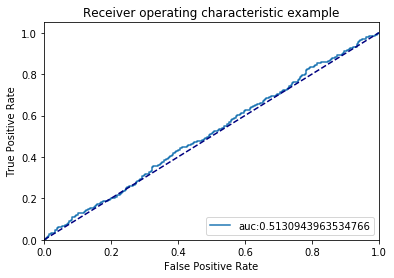

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure()
plt.plot(log_fpr, log_tpr, label = 'auc:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [10]:
sum_stats = q3mergeddata.describe()

for i in labels:
    if(sum_stats[i].loc['50%'] == 0):
        q3mergeddata = q3mergeddata.drop(i, axis = 1)

In [11]:
labels = q3mergeddata.columns[10:len(q3mergeddata.columns) - 5]

X = pd.DataFrame(q3mergeddata[labels].copy())
Y = pd.DataFrame(q3mergeddata['movement'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


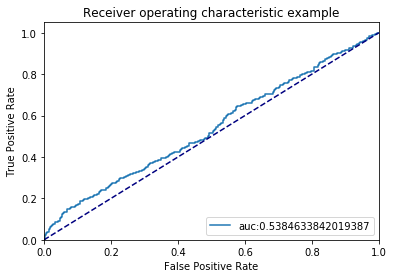

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure()
plt.plot(log_fpr, log_tpr, label = 'auc:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

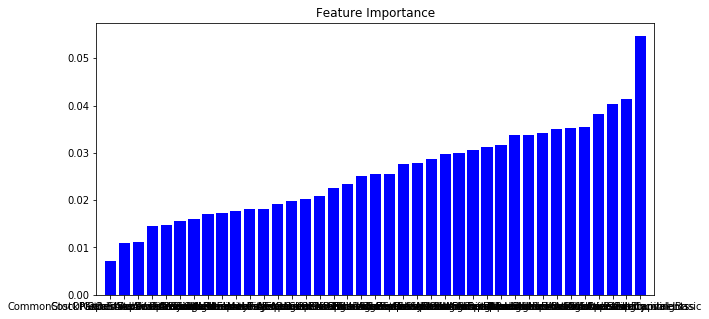

In [14]:
importance = dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices], importance[indices], 
        color = 'b', align = 'center')
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
for i in range(len(importance[indices])):
    if importance[indices][i] == 0:
        q3mergeddata = q3mergeddata.drop(X_train.columns[indices][i], axis = 1)

In [19]:
labels = q3mergeddata.columns[10:len(q3mergeddata.columns) - 5]

X = pd.DataFrame(q3mergeddata[labels].copy())
Y = pd.DataFrame(q3mergeddata['movement'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


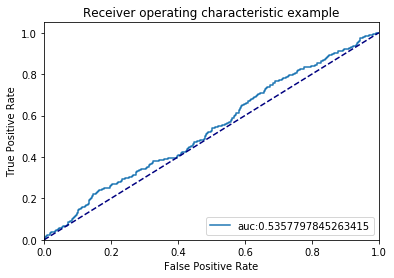

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure()
plt.plot(log_fpr, log_tpr, label = 'auc:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

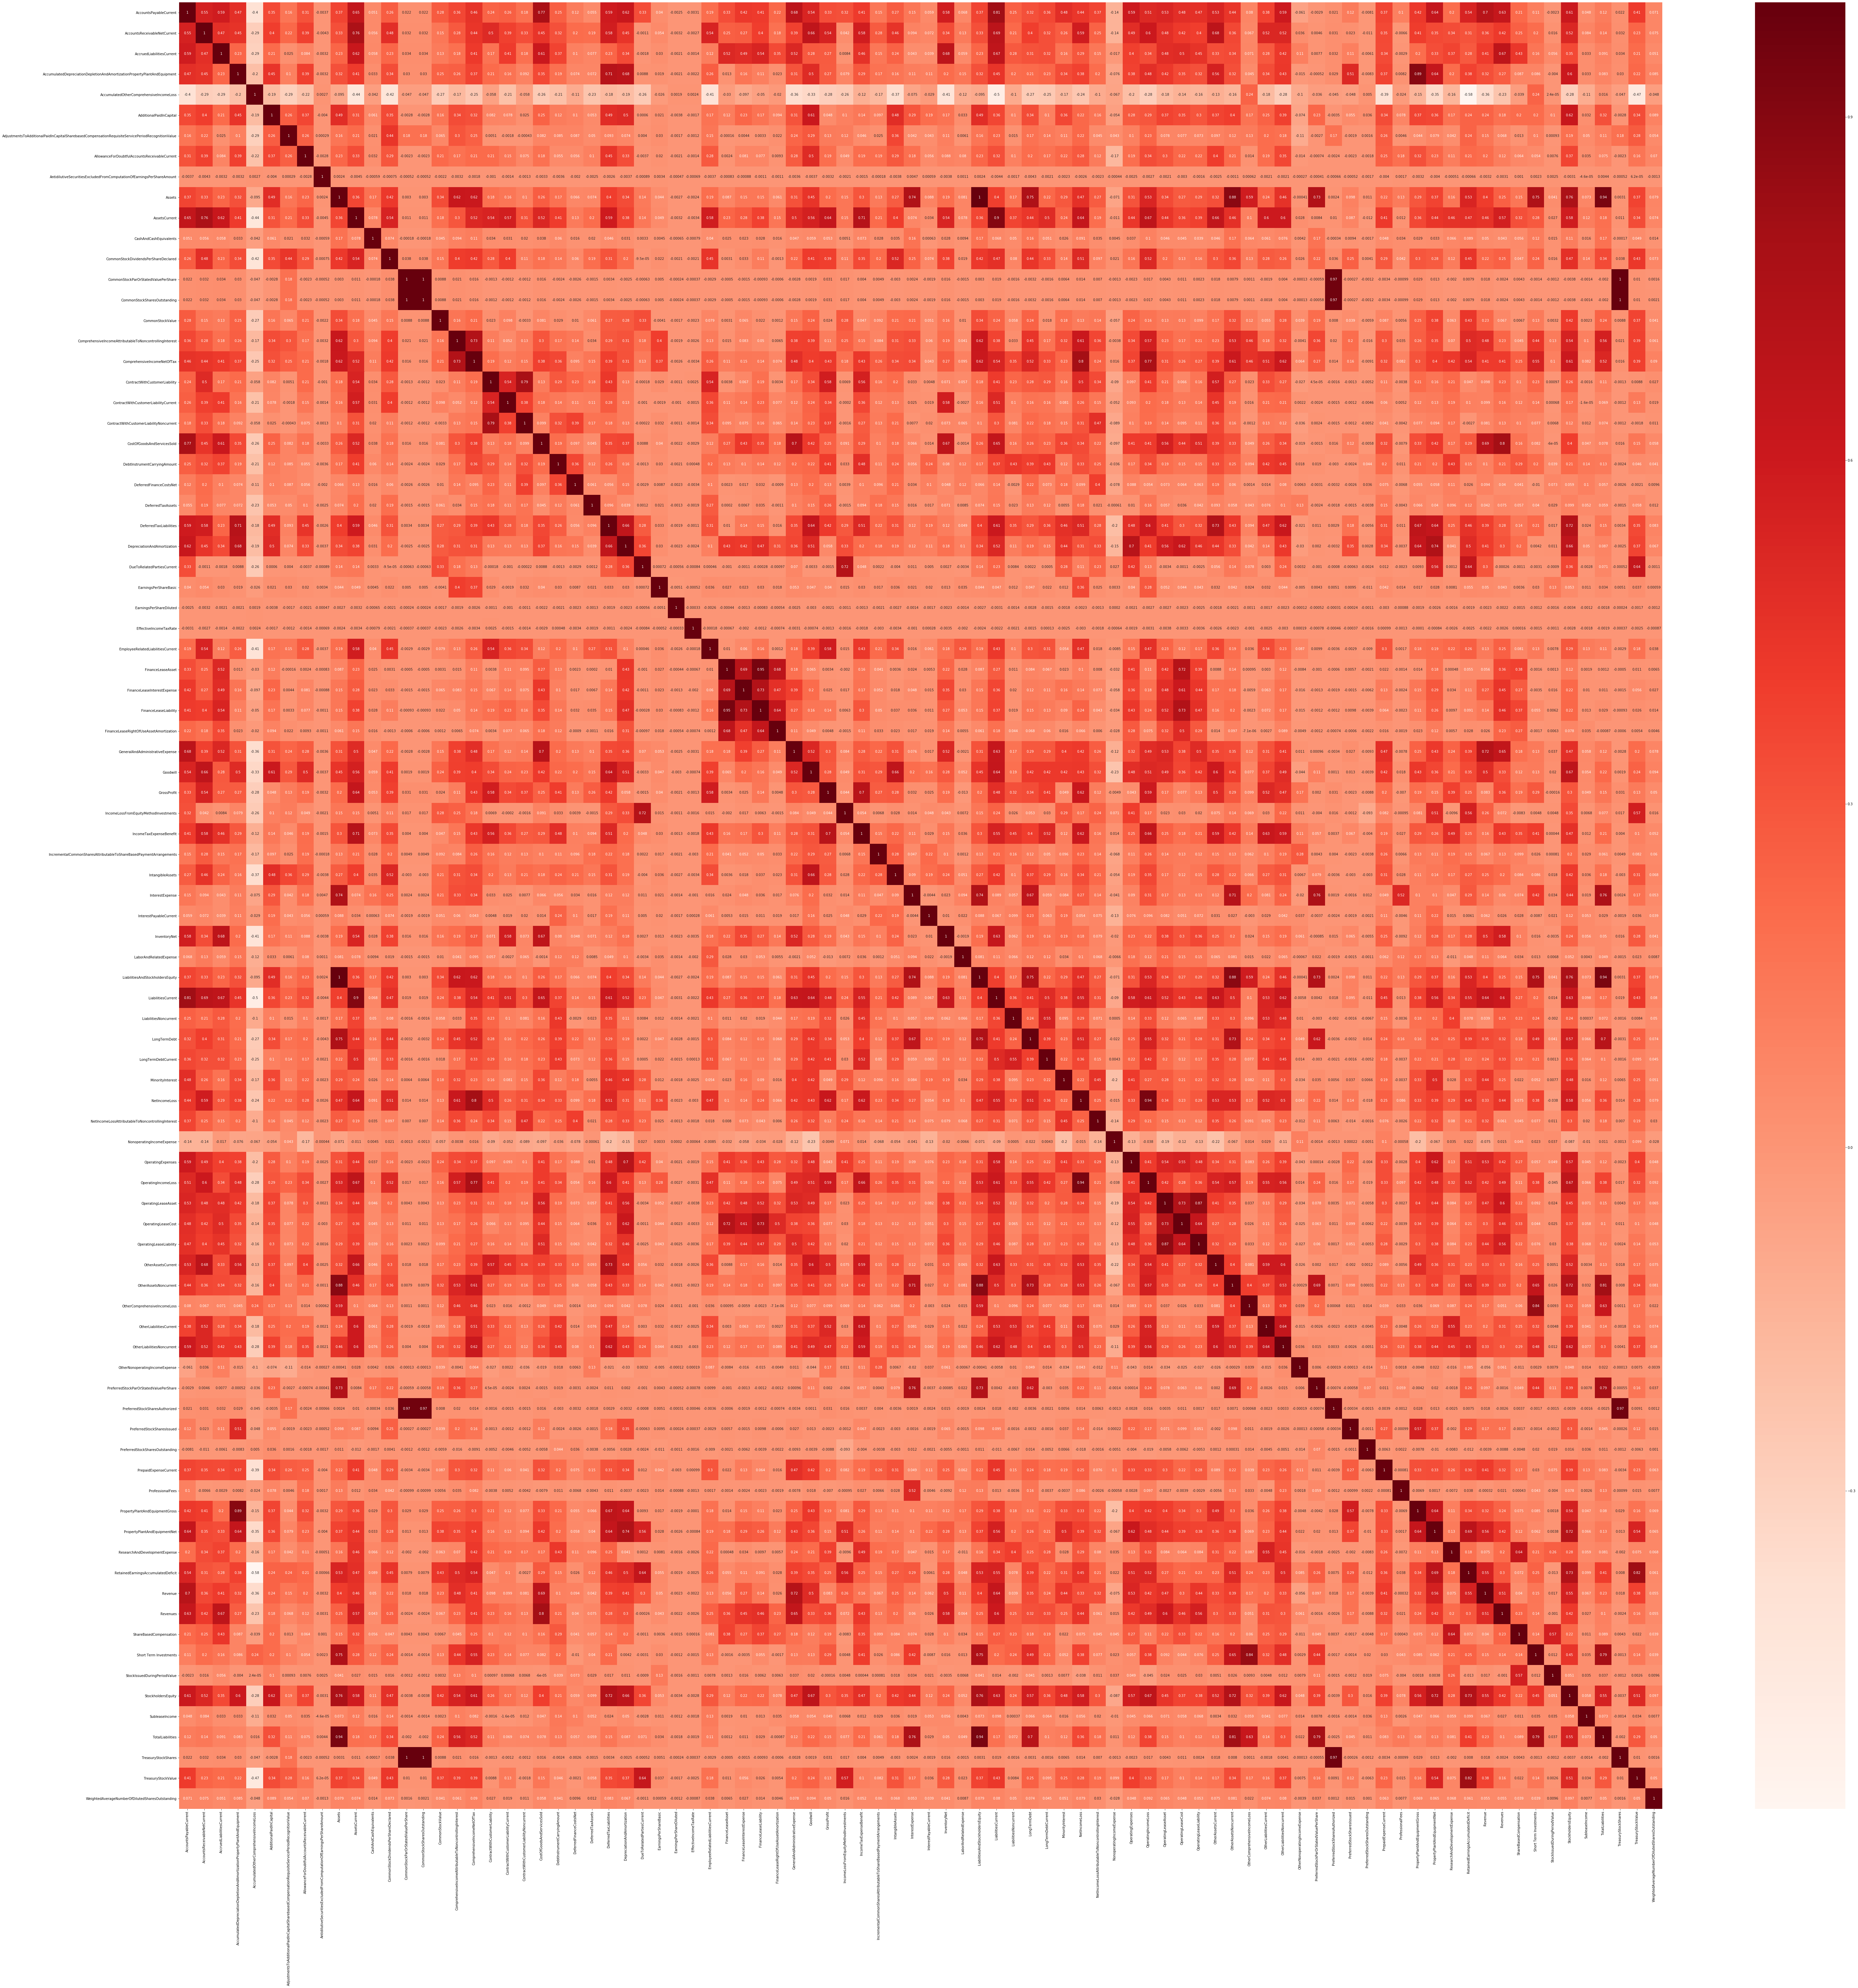

In [26]:
import seaborn as sns
plt.figure(figsize = (100,100))
correlation = q3mergeddata[q3mergeddata.columns[10:len(q3mergeddata.columns) - 5]].corr()
sns.heatmap(correlation, annot = True, cmap = plt.cm.Reds)

Another attempt where dummy variable for missing variables was imputed, and the mean of each variable was replaced for 0 values. Restart the kernel and import data and go straight to this if want to try.

In [10]:
for i in labels:
    q3mergeddata[i+'_mv'] = np.where(q3mergeddata[i] == 0 , 1, 0)
    q3mergeddata[i] = q3mergeddata[i].replace(0, q3mergeddata[i].mean(skipna = True))

In [11]:
x = len(labels)
for i in range(x):
    labels.append(labels[i]+'_mv')

In [15]:
X = pd.DataFrame(q3mergeddata[labels].copy())
Y = pd.DataFrame(q3mergeddata['movement'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


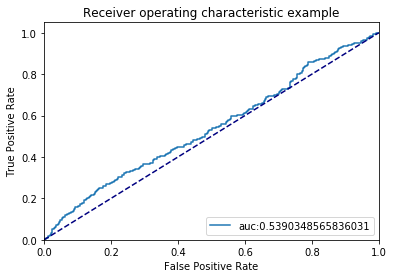

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure()
plt.plot(log_fpr, log_tpr, label = 'auc:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### Predict Company Size, Rerun import before doing this!

Predict Company Size Import Data

In [5]:
q3mergeddata['Company_Value'] = q3mergeddata.WeightedAverageNumberOfDilutedSharesOutstanding *q3mergeddata['7_after']

In [20]:
q3mergeddata = q3mergeddata.drop(q3mergeddata[q3mergeddata.Company_Value == 0].index, inplace = True)

In [22]:
q3mergeddata